# 3. Self-consistent field 

## 3.1 The self-consistent field (SCF) procedure  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34 
m=9.110e-31
epsil=8.854e-12
q=1.602e-19

#Lattice
Np=200
a=(10e-10/Np)
R=a*np.array(list(range(1,Np+1)))
t0=(hbar**2)/(2*m*(a**2))/q

#analytical solutions for 1s hydrogen
a0=4*np.pi*epsil*hbar*hbar/(m*q*q)
P0=(4*a/(a0**3))*R*R*np.exp(-2*R/a0)

#Hamiltonian,H = Kinetic,T + Potential,U + Uscf
T=(2*t0*np.diag(np.ones((Np)))-(t0*np.diag(np.ones((Np-1)),1))-(t0*np.diag(np.ones((Np-1)),-1)))
UN=(-q*14/(4*np.pi*epsil))/R #Z=14 for Silicon
l=1
Ul=(l*(l+1)*hbar*hbar/(2*m*q))/(R*R)

Uscf=np.zeros((Np)) 
change=1

while change>0.1:
    [D,V]=np.linalg.eigh(T+np.diag(UN+Uscf))
    DD=np.sort(D)
    ind=np.array(list(range(0,len(T))))
    E1s=D[ind[0]]; psi=V[:,ind[0]]; P1s=psi*np.conj(psi); P1s=np.transpose(P1s)
    E2s=D[ind[1]]; psi=V[:,ind[1]]; P2s=psi*np.conj(psi); P2s=np.transpose(P2s)
    E3s=D[ind[2]]; psi=V[:,ind[2]]; P3s=psi*np.conj(psi); P3s=np.transpose(P3s)
    
    [D,V]=np.linalg.eigh(T+np.diag(UN+Ul+Uscf))
    DD=np.sort(D)
    ind=np.array(list(range(0,len(T))))
    E2p=D[ind[0]]; psi=V[:,ind[0]]; P2p=psi*np.conj(psi); P2p=np.transpose(P2p)
    E3p=D[ind[1]]; psi=V[:,ind[1]]; P3p=psi*np.conj(psi); P3p=np.transpose(P3p)
    n0=(2*(P1s+P2s+P3s))+(6*P2p)+(2*P3p)
    
    n=n0*(13/14) #Z=14 for Silicon
    Unew=(q/(4*np.pi*epsil))*((sum(n/R)-np.cumsum(n/R))+(np.cumsum(n)/R))
    #Uex=(-q/(4*pi*epsil))*((n/(4*pi*a*R*R))**(1/3)); #Unew=Unew+Uex;
    change=sum(abs(Unew-Uscf))/Np
    Uscf=Unew;

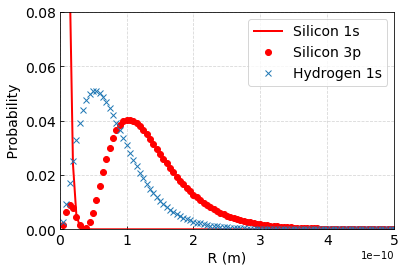

In [2]:
#for figure 3.1.6
plt.figure()

plt.plot(R,P1s,'r',lw=2, label='Silicon 1s')
plt.plot(R,P3p,'ro',lw=2, label='Silicon 3p')
plt.plot(R,P0,'x',lw=2, label='Hydrogen 1s')
plt.xlabel(' R (m) ',fontsize=14)
plt.ylabel(' Probability ',fontsize=14)
plt.xlim(0,5e-10)
plt.ylim(0,0.08)
plt.tick_params(axis='both',which='major',labelsize=14,direction='in')
plt.grid(alpha=0.5, ls='--')
plt.legend(loc=0,fontsize=14)
#plt.text(0.22e-10,0.07,'Silicon 1s',fontsize=14)
#plt.text(0.85e-10,0.045,'Hydrogen 1s',fontsize=14)
#plt.text(1.8e-10,0.02,'Silicon 3p',fontsize=14)